,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,bmi_smoker,age_smoker,age_bmi
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008,-0.000407,-0.011642,0.010016,-0.018383,0.144777,0.879840
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292,-0.011156,0.017117,-0.004184,0.089114,0.069657,0.006280
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341,-0.135996,0.270025,-0.006205,0.108741,0.013957,0.539637
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998,0.024806,-0.023066,0.021914,0.006249,0.020320,0.043180
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251,-0.036945,0.068498,-0.036945,0.974487,0.926984,-0.022946
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000,-0.039905,0.073982,-0.043210,0.845120,0.789253,0.334754
region_northwest,-0.000407,-0.011156,-0.135996,0.024806,-0.036945,-0.039905,1.000000,-0.346265,-0.320829,-0.048467,-0.029346,-0.064660
region_southeast,-0.011642,0.017117,0.270025,-0.023066,0.068498,0.073982,-0.346265,1.000000,-0.346265,0.095453,0.074633,0.104261
region_southwest,0.010016,-0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320829,-0.346265,1.000000,-0.033644,-0.048784,0.013495
bmi_smoker,-0.018383,0.089114,0.108741,0.006249,0.974487,0.845120,-0.048467,0.095453,-0.033644,1.000000,0.908358,0.028517


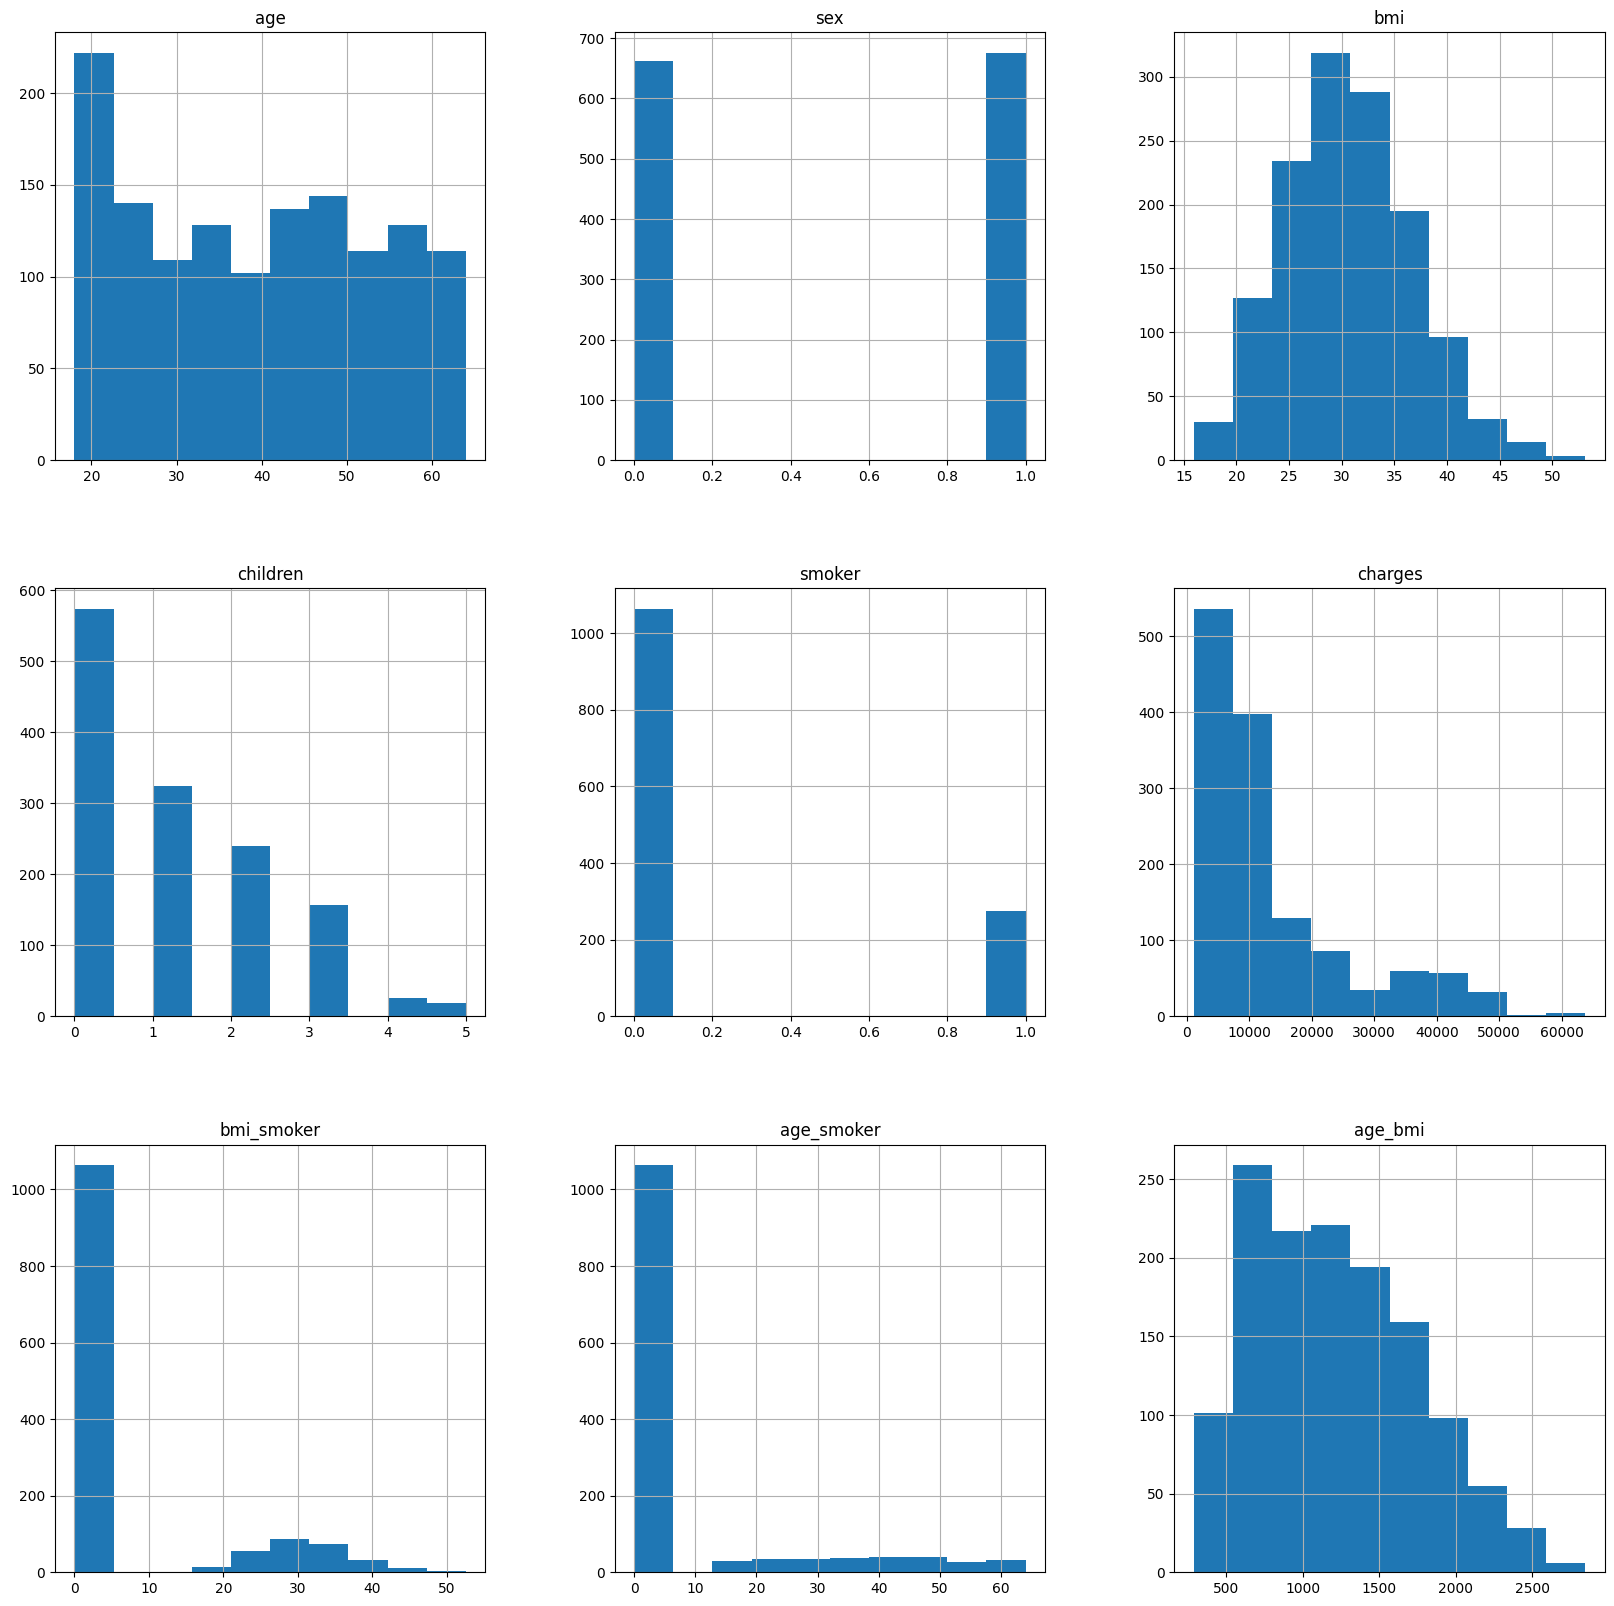

In [1]:
import pandas as pd

df = pd.read_csv("insurance.csv")


df = pd.get_dummies(df, columns=['region'], drop_first=True)
df["smoker"] = [1 if i == "yes" else 0 for i in df["smoker"].values]
df["sex"] = [1 if i == "male" else 0 for i in df["sex"].values]

# df["bmi2"] = df["bmi"] ** 2
# df["age2"] = df["age"] ** 2
# df["children2"] = df["children"] ** 2

df["bmi_smoker"] = df["bmi"] * df["smoker"]
df["age_smoker"] = df["age"] * df["smoker"]
df["age_bmi"] = df["age"] * df["bmi"]

df.hist(figsize=(20, 20))
df.corr()

But what about outliers ?

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import numpy as np

train_set, test_set = train_test_split(df, test_size=0.3, random_state=42)
train_y = np.log1p(train_set['charges'])
train_x = train_set.drop('charges', axis=1)

test_y = np.log1p(test_set['charges'])
test_x = test_set.drop('charges', axis=1)

scaler = StandardScaler()
scaler.fit(train_x)
train_x_sc = scaler.transform(train_x)
scaler.fit(test_x)
test_x_sc = scaler.transform(test_x)


In [3]:

lin_reg = LinearRegression()
lin_reg.fit(train_x_sc, train_y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


d:\Projects\ml\LinearRegression\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


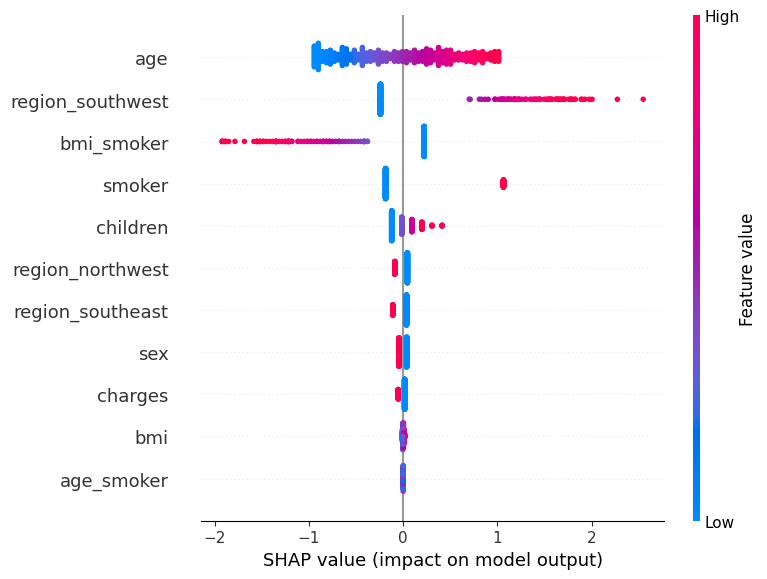

In [4]:
import shap

explainer = shap.Explainer(lin_reg, train_x_sc)
shap_values = explainer(test_x_sc)

shap.summary_plot(shap_values, test_x_sc, feature_names=df.columns, sort=True)

In [5]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = lin_reg.predict(test_x_sc)
mse = mean_squared_error(test_y, y_pred)
r2 = r2_score(test_y, y_pred)
print(f"Coeff: {lin_reg.coef_}\nIntercept: {lin_reg.intercept_}\nMSE: {mse:.2f}\nR2: {r2:.2f}")

Coeff: [ 5.90715333e-01 -4.08557452e-02  6.48455379e-03  1.27077132e-01
  4.97436209e-01 -2.91066820e-02 -6.11820456e-02 -6.34231994e-02
  6.77379445e-01 -5.67799376e-01  3.53202991e-05]
Intercept: 9.109175389698576
MSE: 0.14
R2: 0.83


polynomial and outliers

Coeff: [3688.58318998   52.38868121 2090.99783407  514.02360356 9595.8681675
 -209.32555139 -426.26277109 -394.01444936]

Intercept: 13379.157306773504

MSE: 33807391.92

R2: 0.77

after poly features and interaction

Coeff: [-1737.13605269  -210.22331706  3255.81602322  1026.04195485
 -8517.60212985  -327.76221213  -410.71108773  -483.28615244
 -3726.48359918  4483.90896965  -269.62212558 18615.91301546
   -49.36230896  1243.27714628]

Intercept: 13379.157306773503

MSE: 19877778.34

R2: 0.86

try regularization, cross validation, log charges, find outliers

regularization: same result

when y -> log1p(y) we 

Coeff: [ 0.80809426 -0.03929545  0.29096398  0.14449023  0.50140959 -0.03356906
 -0.05876411 -0.06643065 -0.30667693 -0.26488545 -0.0317137   0.67628062
 -0.57047312  0.04954001]

Intercept: 9.109175389698576

MSE: 0.14

R2: 0.83
